In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
from k3pi_utilities import variables as vars
from k3pi_config import config
from analysis import selection, add_variables, final_selection
import seaborn.apionly as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from analysis.mass_fitting import fit_config, shapes
from hep_ml import splot
from k3pi_config.modes import MODE
from k3pi_cpp import invariant_mass_pair

/afs/cern.ch/user/d/dmuller/work/anaconda3/envs/k3pi_python3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/afs/cern.ch/user/d/dmuller/work/anaconda3/envs/k3pi_python3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
from k3pi_config.modes import gcm, MODE
from k3pi_config import config
config.candidates_selection = True
config.optimised_selection = True

In [3]:
from k3pi_config import get_mode


mode = get_mode('MagBoth', 1516, 'RS')

In [4]:
with MODE('MagBoth', 1516, 'RS'):
    sel = final_selection.get_final_selection()
    df = mode.get_data([vars.pt(mode.Pi_OS1), vars.eta(mode.Pi_OS1), vars.phi(mode.Pi_OS1), vars.pt(mode.Pi_OS2), vars.eta(mode.Pi_OS2), vars.phi(mode.Pi_OS2), vars.pt(mode.Pi_SS), vars.eta(mode.Pi_SS), vars.phi(mode.Pi_SS)])

INFO:buffer_load:Loading Cached/full_selectionD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/bdt_selectionD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/spearmint_spi_selectionD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_right_sign_candidatesD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/randomly_remove_candidatesD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_clonesD0ToKpipipi_RSMagBoth1516 from output/data/store.h5


In [5]:
pimass = config.PDG_MASSES['K']
mass1 = invariant_mass_pair(df[vars.pt(mode.Pi_OS1)], df[vars.eta(mode.Pi_OS1)], df[vars.phi(mode.Pi_OS1)], pimass, df[vars.pt(mode.Pi_SS)], df[vars.eta(mode.Pi_SS)], df[vars.phi(mode.Pi_SS)], pimass)

In [ ]:
mass1 = invariant_mass_pair

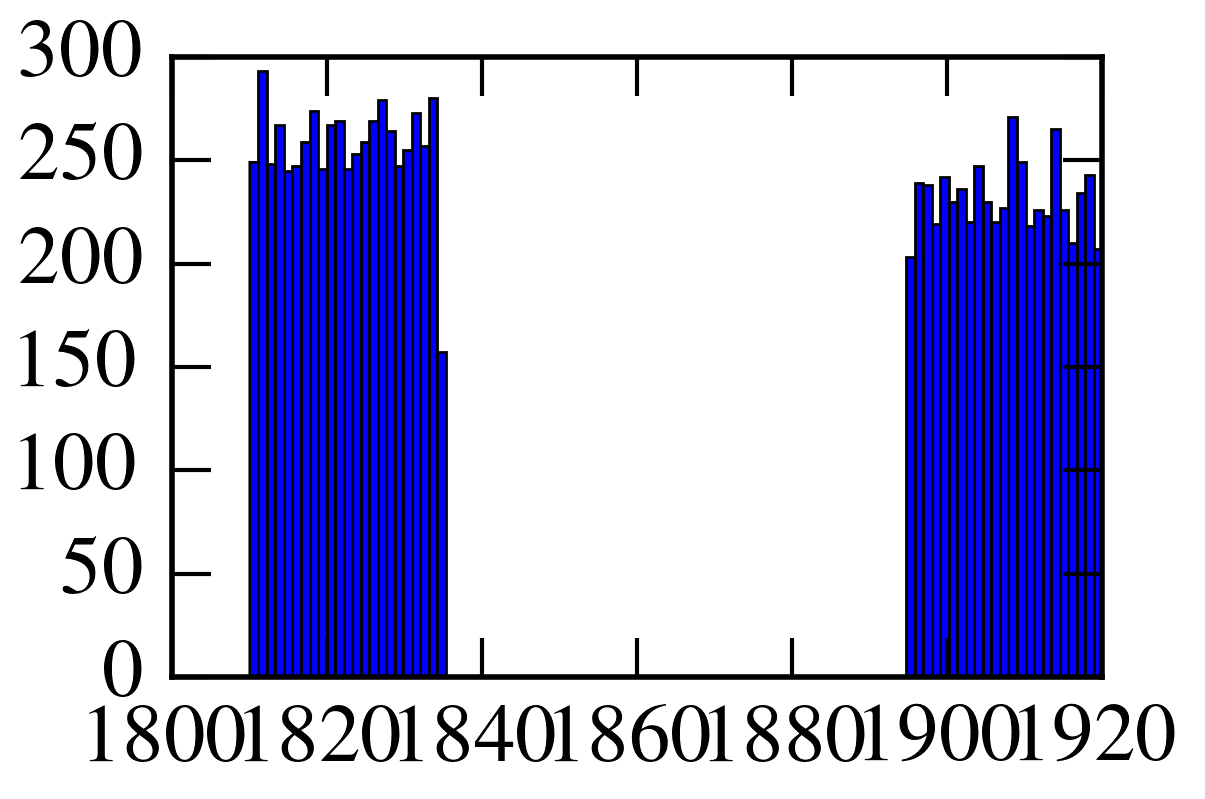

In [64]:
plt.hist(data.D0_M[better], bins=100);

In [65]:
sum(better)

11226

In [4]:
sel=selection.pid_selection(mode)
sel &= selection.pid_fiducial_selection(mode)
sel &= selection.mass_fiducial_selection(mode)
sel &= selection.slow_pion(mode)

In [29]:
data = data[sel]



In [15]:
shapes.load_shape_class('RooCruijff')
shapes.load_shape_class('RooJohnsonSU')
shapes.load_shape_class('RooBackground')
wsp = fit_config.load_workspace(mode)
data_vars = wsp.set('datavars')

In [36]:
@np.vectorize
def call_after_set(pdf, wsp, **kwargs):
    for var, val in kwargs.iteritems():
        fnd = wsp.var(var)
        if fnd:
            fnd.setVal(val)
    return pdf.getVal()
        
sig_pdf = wsp.pdf('signal')
rnd_pdf = wsp.pdf('random')
comb_pdf = wsp.pdf('combinatorial')

In [43]:
sig_prob = call_after_set(sig_pdf, wsp, **data)
rnd_prob = call_after_set(rnd_pdf, wsp, **data)
comb_prob = call_after_set(comb_pdf, wsp, **data)
probs = pd.DataFrame(dict(signal=sig_prob, random=rnd_prob, combinatorial=comb_prob))
probs = probs.div(probs.sum(axis=1), axis=0)

In [44]:
sWeights = splot.compute_sweights(probs)

In [47]:
sWeights

,combinatorial,random,signal
0,-0.034727,1.078675,-0.043948
1,-0.098559,-0.110735,1.209293
2,-0.144809,1.190255,-0.045446
3,-0.067705,0.855549,0.212156
4,-0.129548,1.174668,-0.045120
5,-0.146314,1.192159,-0.045845
6,1.356786,-0.336484,-0.020302
7,1.273713,-0.251999,-0.021714
8,0.448807,0.582905,-0.031712
9,-0.029546,1.073407,-0.043860


In [35]:
wsp.Print()


RooWorkspace(D0ToKpipipi_WS) D0ToKpipipi_WS contents

variables
---------
(D0_M,NBkg,NSPi,NSig,a_dm_bkg,a_dm_sp,alpha_m_L,alpha_m_R,c,delta_m_dtf,mu_dm,mu_m,nu_dm,set_up_done,sigma_m_L,sigma_m_R,tau_dm,width_dm)

p.d.f.s
-------
RooProdPdf::combinatorial[ m_bkg * pdf_dm_bkg ] = 0.00997137
RooChebychev::m_bkg[ x=D0_M coefList=(c) ] = 1.01772
RooJohnsonSU::pdf_dm_[ x=delta_m_dtf mean=mu_dm width=width_dm nu=nu_dm tau=tau_dm ] = 0.000268307
RooBackground::pdf_dm_bkg[ x=delta_m_dtf par=a_dm_bkg ] = 0.0097978
RooBackground::pdf_dm_sp[ x=delta_m_dtf par=a_dm_sp ] = 0.128919
RooCruijff::pdf_m_sig[ x=D0_M mean=mu_m sigmaL=sigma_m_L sigmaR=sigma_m_R alphaL=alpha_m_L alphaR=alpha_m_R ] = 0.00324995
RooProdPdf::random[ pdf_m_sig * pdf_dm_sp ] = 0.000418981
RooProdPdf::signal[ pdf_m_sig * pdf_dm_ ] = 8.71984e-07
RooAddPdf::total[ NSig * signal + NSPi * random + NBkg * combinatorial ] = 0.00335338

named sets
----------
datavars:(delta_m_dtf,D0_M)

